In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
os.chdir("/Users/guneshs/datasets")
os.listdir()

['.DS_Store',
 'Iris_data_sample.txt',
 'Iris_data_sample.xlsx',
 'filtered.csv',
 'Iris_data_sample.csv',
 'Toyota.csv',
 'modified.txt']

In [6]:
## create a new dataframe from cars_data
cars_data = pd.read_csv('Toyota.csv', index_col=0,
                        na_values=["??","????"])

In [7]:
cars_data.dropna(axis=0, inplace=True )

In [8]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1435
Data columns (total 10 columns):
Price        1096 non-null int64
Age          1096 non-null float64
KM           1096 non-null float64
FuelType     1096 non-null object
HP           1096 non-null float64
MetColor     1096 non-null float64
Automatic    1096 non-null int64
CC           1096 non-null int64
Doors        1096 non-null object
Weight       1096 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 94.2+ KB


## Data Visuliazation using Matplotlib

## Scatter Plot

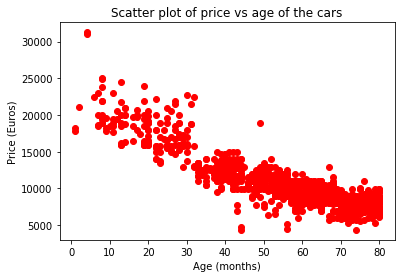

In [9]:
plt.scatter(cars_data['Age'], cars_data['Price'], c='red')
plt.title('Scatter plot of price vs age of the cars')
plt.xlabel('Age (months)')
plt.ylabel('Price (Euros)')
plt.show()

## Histogram

Text(0, 0.5, 'Frequency')

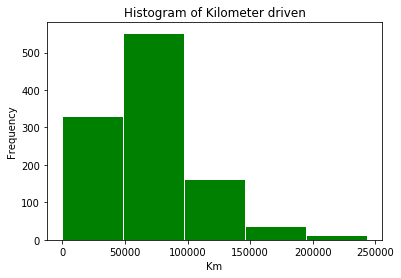

In [10]:
plt.hist(cars_data['KM'],
        color='green',
        edgecolor='white',
        bins=5)
plt.title('Histogram of Kilometer driven')
plt.xlabel('Km')
plt.ylabel('Frequency')

## Bar plot

In [11]:
counts = cars_data['FuelType'].value_counts()
print(counts)

Petrol    968
Diesel    116
CNG        12
Name: FuelType, dtype: int64


In [12]:
fueltype = np.unique(cars_data['FuelType'])
fueltype = fueltype[::-1]

In [13]:
print(fueltype)

['Petrol' 'Diesel' 'CNG']


In [14]:
index = np.arange(len(fueltype))

([<matplotlib.axis.XTick at 0x11d3a50b8>,
 <a list of 3 Text xticklabel objects>)

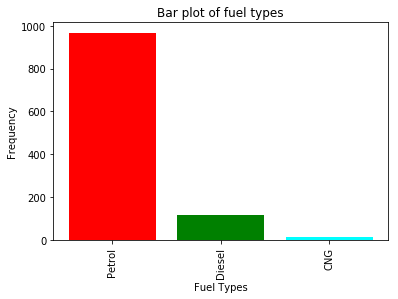

In [15]:
plt.bar(index, counts, color=['red','green','cyan'])
plt.title("Bar plot of fuel types")
plt.xlabel("Fuel Types")
plt.ylabel("Frequency")
plt.xticks(index, fueltype, rotation=90)

## Data Visuliazation using Seaborn

In [16]:
import seaborn as sns

## Scatter Plot

In [17]:
sns.set(style="darkgrid")

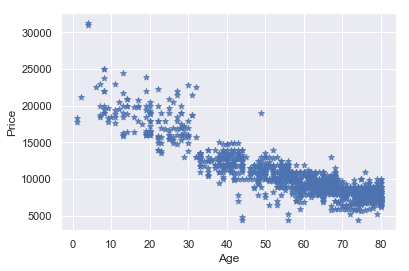

In [18]:
sns.regplot(x=cars_data['Age'], y=cars_data['Price'], 
            fit_reg=False,
           marker="*")

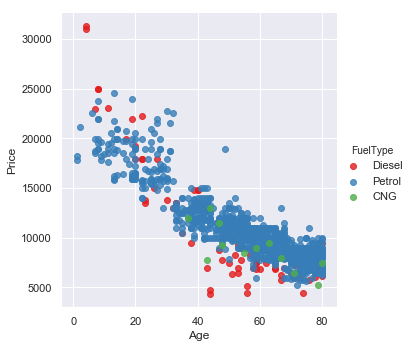

In [19]:
sns.lmplot(x='Age', y='Price', data=cars_data,
          fit_reg=False,
          hue='FuelType',
          legend=True,
          palette="Set1")

## Histogram

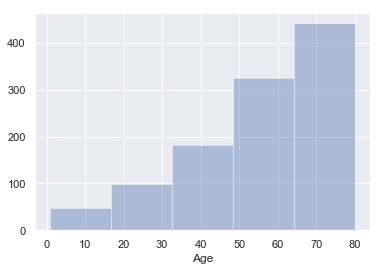

In [20]:
sns.distplot(cars_data['Age'],
             kde=False,
            bins=5)

## Barplot

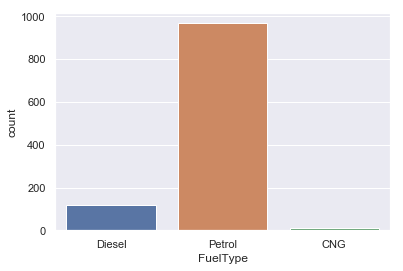

In [21]:
sns.countplot(x="FuelType", data=cars_data)

### Barplot with a categorical variable

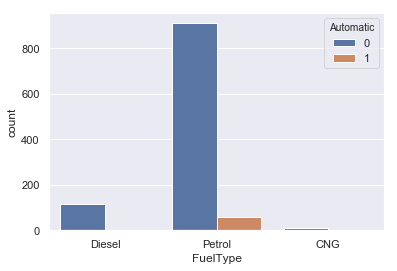

In [22]:
sns.countplot(x="FuelType", data=cars_data,
             hue="Automatic")

## Box and Whiskers Plot

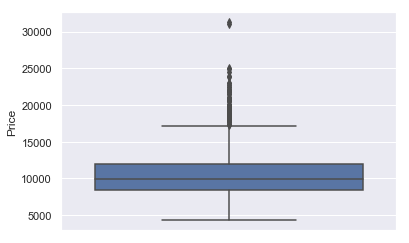

In [23]:
sns.boxplot(y=cars_data["Price"])

## Box and Whiskers plot with 2 variable

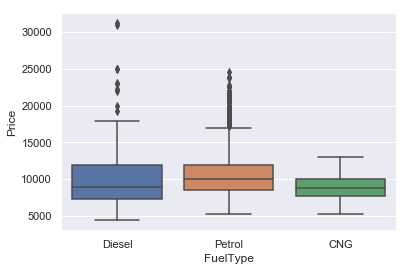

In [24]:
sns.boxplot(x=cars_data["FuelType"], 
           y=cars_data["Price"],
           )

## Box and Whiskers plot with 3 variable

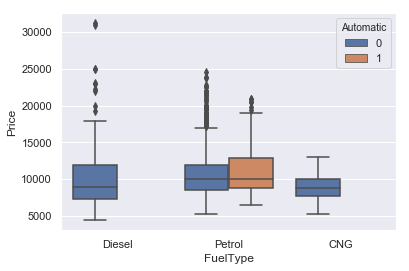

In [25]:
sns.boxplot(x="FuelType", 
            y="Price",
            data=cars_data,
            hue="Automatic"
           )

## Box Whiskers and Histogram Plot in the same window

/Users/guneshs/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


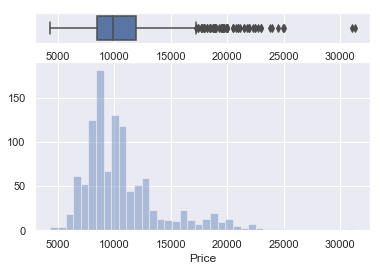

In [26]:
f, (ax_box,ax_hist) = plt.subplots(2, gridspec_kw=
                                  {"height_ratios":(.15,.85)})
sns.boxplot(cars_data["Price"], ax=ax_box)
sns.distplot(cars_data["Price"], ax=ax_hist, kde=False)

## Pairwise Plot with FuelType

/Users/guneshs/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/guneshs/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/guneshs/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


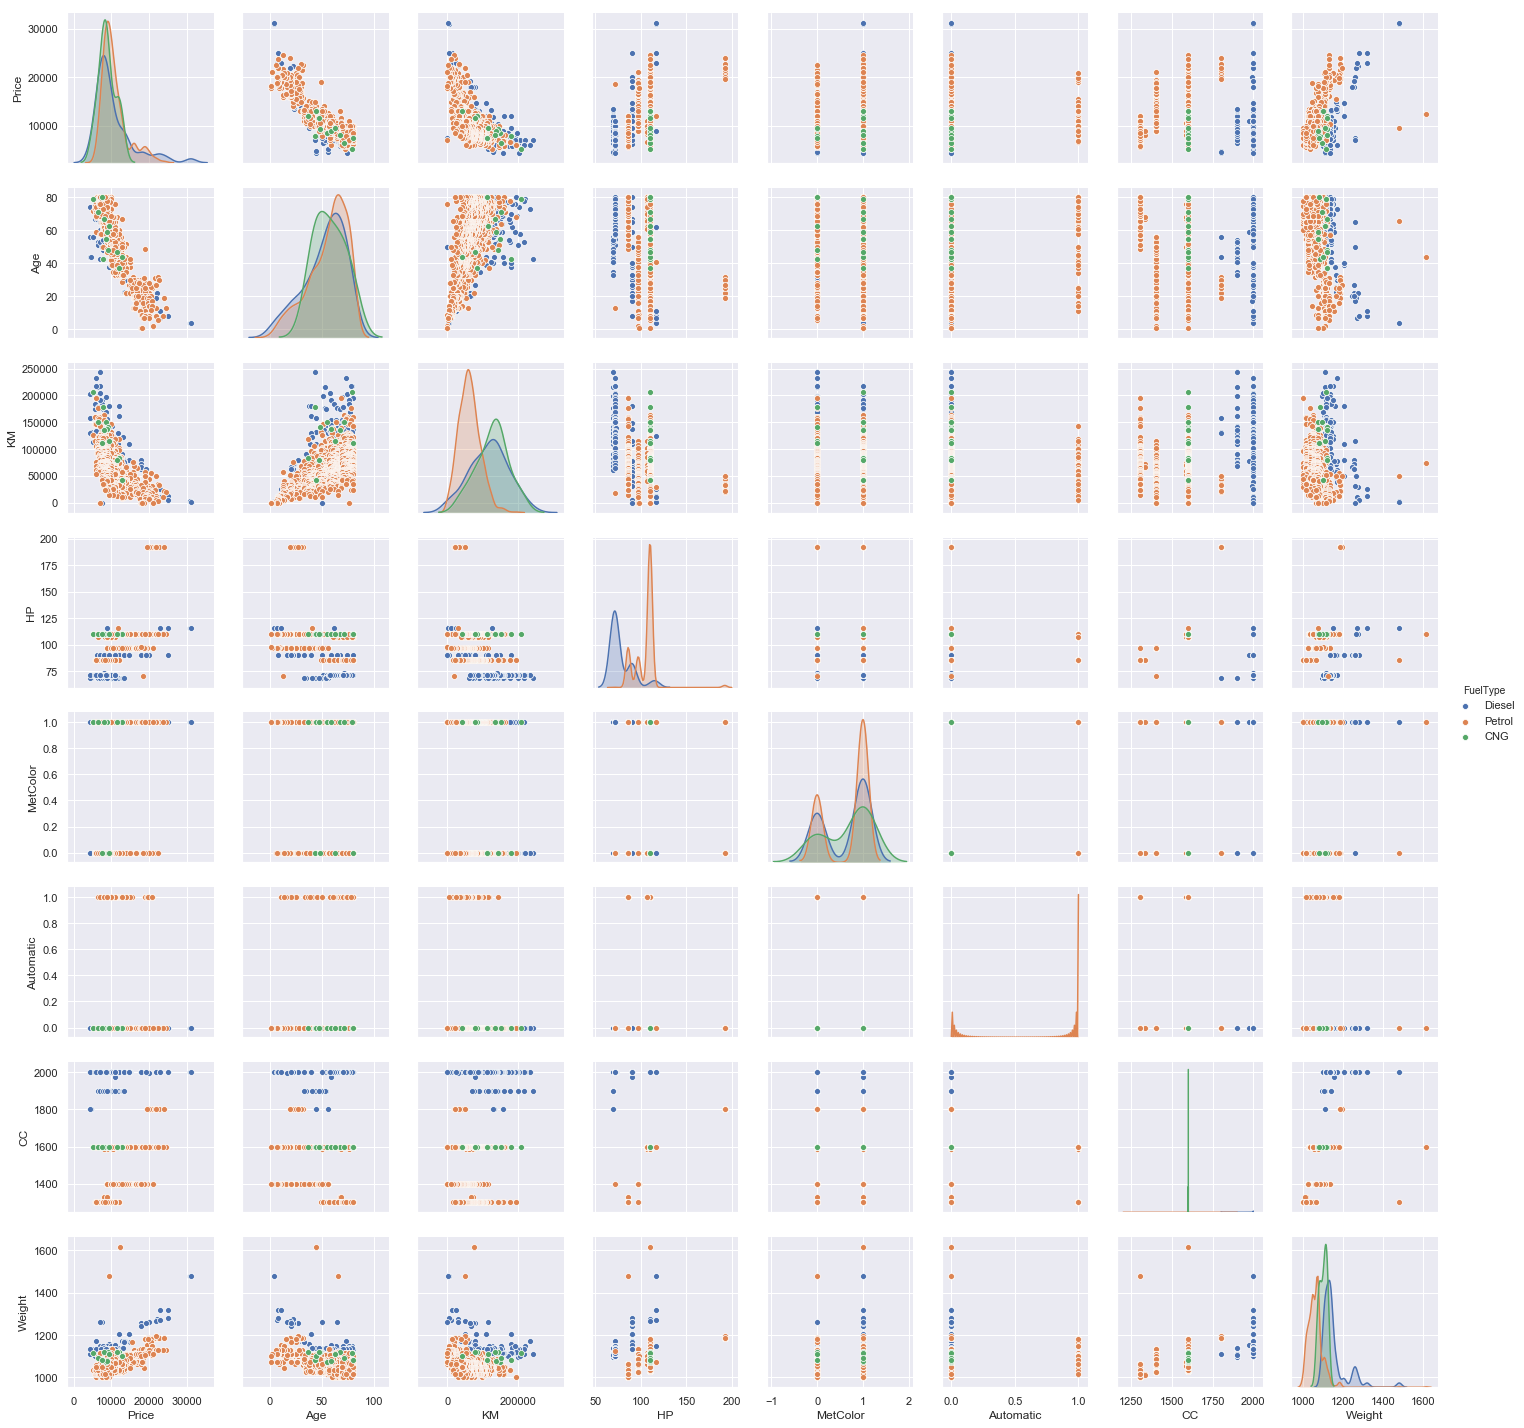

In [27]:
sns.pairplot(cars_data, kind="scatter", hue="FuelType")